Number of measurements (m): 104


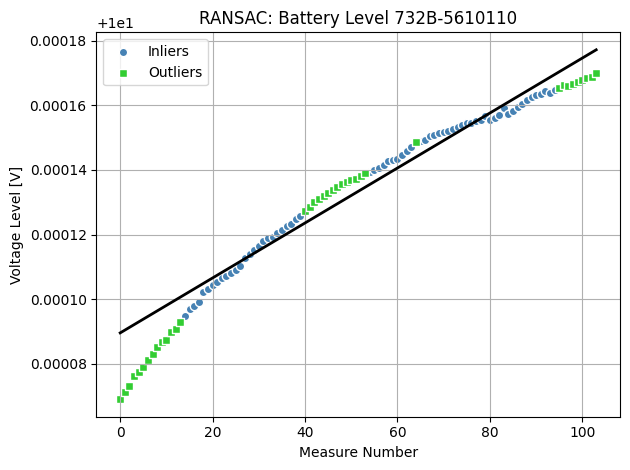

Slope: 0.00000085
Intercept: 10.00008957 V

Predicted Measure Number = 104, prediction is 10.00017802 V
Predicted Measure Number = 105, prediction is 10.00017887 V
Predicted Measure Number = 106, prediction is 10.00017972 V
Predicted Measure Number = 107, prediction is 10.00018057 V
Predicted Measure Number = 108, prediction is 10.00018142 V
Predicted Measure Number = 109, prediction is 10.00018227 V
Predicted Measure Number = 110, prediction is 10.00018312 V
Predicted Measure Number = 111, prediction is 10.00018397 V
Predicted Measure Number = 112, prediction is 10.00018483 V
Predicted Measure Number = 113, prediction is 10.00018568 V
Predicted Measure Number = 114, prediction is 10.00018653 V
Predicted Measure Number = 115, prediction is 10.00018738 V

Median Absolute Deviation: 0.00001967 V


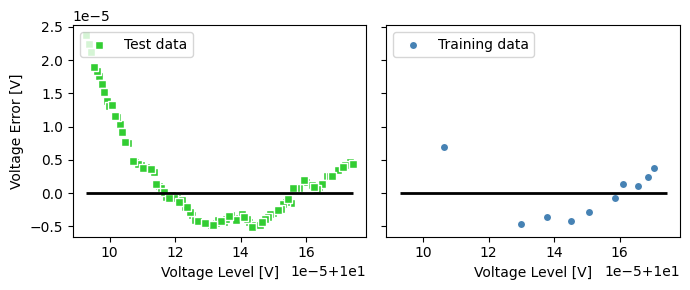

MSE train: 0.000000000013
MSE test: 0.000000000053
MAE train: 0.000003163080
MAE test: 0.000005066120
R^2 train: 0.965
R^2 test: 0.933



In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# load the dataset
data = np.loadtxt('110data2.csv', usecols=[1], delimiter=',')
X = np.arange(len(data))
y = data
#print(data)
print ('Number of measurements (m):', data.shape[0])

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=150000, # default
                         min_samples=0.95, 
                         loss='absolute_error', # default
                         residual_threshold=5*1e-6, # 5 ppm error
                         random_state=123)

X = X.reshape(-1,1)

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(0, 104, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.title('RANSAC: Battery Level 732B-5610110')
plt.ylabel('Voltage Level [V]')
plt.xlabel('Measure Number')
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

print(f'Slope: {ransac.estimator_.coef_[0]:.8f}')
print(f'Intercept: {ransac.estimator_.intercept_:.8f} V')

print()
a = 12
predict = np.zeros(a)
for idx, i in enumerate(range(104, 104 + a)):
    predict[idx] = i * ransac.estimator_.coef_[0] + ransac.estimator_.intercept_
    print(f"Predicted Measure Number = {i}, prediction is {predict[idx]:.8f} V")
    
print()

def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))

print(f'Median Absolute Deviation: {median_absolute_deviation(y):.8f} V')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=123)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Voltage Error [V]')

for ax in (ax1, ax2):
    ax.set_xlabel('Voltage Level [V]')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-1e-8, xmax=x_max+1e-8, color='black', lw=2)

plt.tight_layout()
plt.show()

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.12f}')
print(f'MSE test: {mse_test:.12f}')

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.12f}')
print(f'MAE test: {mae_test:.12f}')

r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.3f}')
print(f'R^2 test: {r2_test:.3f}')
print()

In [33]:
for idx, i in enumerate(range(104, 104 + a)):
    predict[idx] = i * ransac.estimator_.coef_[0] + ransac.estimator_.intercept_
    print(f"{predict[idx]:.8f} V")

10.00017802 V
10.00017887 V
10.00017972 V
10.00018057 V
10.00018142 V
10.00018227 V
10.00018312 V
10.00018397 V
10.00018483 V
10.00018568 V
10.00018653 V
10.00018738 V
